# PadiCare - Rice Leaf Disease Detection using CNN Model

Bangkit 2023 Product-based Capstone

Team ID: C23-PS226
1. [ML] M350DSX0169 - Ivan Tandella - Universitas Sumatera Utara
2. [ML] M350DSY0137 - Putri Yanti Nahampun - Universitas Sumatera Utara
3. [MD] A350DKX4428 - Reinaldhy Suzeta Purba - Universitas Sumatera Utara
4. [MD] A163DSX2278 - Muhammad Khoirul Afwan - Universitas Dian Nuswantoro
5. [CC] C163DSX2962 - Royef Fahrezal Setya Arfianysah - Universitas Dian Nuswantoro
6. [CC] C163DSX2963 - Muchamad Yudhistira - Universitas Dian Nuswantoro

# 1. Starter

Import required libraries

In [ ]:
import os
import zipfile
import random
import shutil
from shutil import copyfile

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

Download zip file dataset from drive

In [ ]:
import gdown

url = 'https://drive.google.com/uc?id=1BlpYYR9u8dDaoJgmHmOixrRiQUN4Pbpi'
output_path = 'rice_leaf_diseases.zip'
gdown.download(url, output_path, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1BlpYYR9u8dDaoJgmHmOixrRiQUN4Pbpi
To: /content/rice-leaf-diseases.zip
100%|██████████| 38.4M/38.4M [00:01<00:00, 24.0MB/s]


'rice-leaf-diseases.zip'

Unzip and extract dataset

In [ ]:
local_zip = '/content/rice_leaf_diseases.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

The images are stored in /content/rice_leaf_diseases directory. There is a sub directory for each class: Bacterial Leaf Blight, Brown Spot, and Leaf Smut

In [ ]:
source_path = '/content/rice_leaf_diseases'

source_path_leaf_blight = os.path.join(source_path, 'Bacterial leaf blight')
source_path_brown_spot = os.path.join(source_path, 'Brown spot')
source_path_leaf_smut = os.path.join(source_path, 'Leaf smut')

# os.listdir returns a list containing all files under the given path
print(f"There are {len(os.listdir(source_path_leaf_blight))} images of bacterial leaf blight.")
print(f"There are {len(os.listdir(source_path_brown_spot))} images of brown spot.")
print(f"There are {len(os.listdir(source_path_leaf_smut))} images of leaf smut.")

There are 40 images of bacterial leaf blight.
There are 40 images of brown spot.
There are 40 images of leaf smut.


# 2. Split Dataset

Make new directory for training and validation data

In [ ]:
# Define root directory
root_dir = '/content/rice_plant_diseases'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

os.makedirs(os.path.join(root_dir, 'training'))
os.makedirs(os.path.join(f'{root_dir}/training', 'bacterial leaf blight'))
os.makedirs(os.path.join(f'{root_dir}/training', 'brown spot'))
os.makedirs(os.path.join(f'{root_dir}/training', 'leaf smut'))
os.makedirs(os.path.join(root_dir, 'validation'))
os.makedirs(os.path.join(f'{root_dir}/validation', 'bacterial leaf blight'))
os.makedirs(os.path.join(f'{root_dir}/validation', 'brown spot'))
os.makedirs(os.path.join(f'{root_dir}/validation', 'leaf smut'))

This is the function used for spliting the data.

In [ ]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  """
  Splits the data into train and test sets

  Args:
    SOURCE_DIR (string): directory path containing the images
    TRAINING_DIR (string): directory path to be used for training
    VALIDATION_DIR (string): directory path to be used for validation
    SPLIT_SIZE (float): proportion of the dataset to be used for training

  Returns:
    None
  """

  shuffled_source = random.sample(os.listdir(SOURCE_DIR), len(os.listdir(SOURCE_DIR)))

  training_number = int(len(shuffled_source) * SPLIT_SIZE)

  i=0
  target = TRAINING_DIR

  for img in shuffled_source:
    img_source = os.path.join(SOURCE_DIR, img)
    copyfile(img_source, os.path.join(target, img))
    i += 1

    if i == training_number:
      target = VALIDATION_DIR

Define the source directory of the dataset and the target directory for spliting the data. We will split the data into 80% of train set, and 20% of validation set

In [ ]:
# Define paths
LB_SOURCE_DIR = "/content/rice_leaf_diseases/Bacterial leaf blight/"
BS_SOURCE_DIR = "/content/rice_leaf_diseases/Brown spot/"
LS_SOURCE_DIR = "/content/rice_leaf_diseases/Leaf smut/"

TRAINING_DIR = "/content/rice_plant_diseases/training/"
VALIDATION_DIR = "/content/rice_plant_diseases/validation/"

TRAINING_LB_DIR = os.path.join(TRAINING_DIR, "bacterial leaf blight/")
VALIDATION_LB_DIR = os.path.join(VALIDATION_DIR, "bacterial leaf blight/")

TRAINING_BS_DIR = os.path.join(TRAINING_DIR, "brown spot/")
VALIDATION_BS_DIR = os.path.join(VALIDATION_DIR, "brown spot/")

TRAINING_LS_DIR = os.path.join(TRAINING_DIR, "leaf smut/")
VALIDATION_LS_DIR = os.path.join(VALIDATION_DIR, "leaf smut/")

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_LB_DIR)) > 0:
  for file in os.scandir(TRAINING_LB_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_BS_DIR)) > 0:
  for file in os.scandir(TRAINING_BS_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_LS_DIR)) > 0:
  for file in os.scandir(TRAINING_LS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_LB_DIR)) > 0:
  for file in os.scandir(VALIDATION_LB_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_BS_DIR)) > 0:
  for file in os.scandir(VALIDATION_BS_DIR):
    os.remove(file.path)
if len(os.listdir(VALIDATION_LS_DIR)) > 0:
  for file in os.scandir(VALIDATION_LS_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .8

# Run the function
split_data(LB_SOURCE_DIR, TRAINING_LB_DIR, VALIDATION_LB_DIR, split_size)
split_data(BS_SOURCE_DIR, TRAINING_BS_DIR, VALIDATION_BS_DIR, split_size)
split_data(LS_SOURCE_DIR, TRAINING_LS_DIR, VALIDATION_LS_DIR, split_size)


In [ ]:
# Check that the number of images matches the expected output

# Original data
print(f"Original BACTERIAL LEAF BLIGHT's directory has {len(os.listdir(LB_SOURCE_DIR))} images")
print(f"Original BROWN SPOT's directory has {len(os.listdir(BS_SOURCE_DIR))} images")
print(f"Original LEAF SMUT's directory has {len(os.listdir(LS_SOURCE_DIR))} images\n")

# Training and validation splits
print(f"There are {len(os.listdir(TRAINING_LB_DIR))} images of BACTERIAL LEAF BLIGHT for training")
print(f"There are {len(os.listdir(TRAINING_BS_DIR))} images of BROWN SPOT for training")
print(f"There are {len(os.listdir(TRAINING_LS_DIR))} images of LEAF SMUT for training")
print(f"There are {len(os.listdir(VALIDATION_LB_DIR))} images of BACTERIAL LEAF BLIGHT for validation")
print(f"There are {len(os.listdir(VALIDATION_BS_DIR))} images of BROWN SPOT for validation")
print(f"There are {len(os.listdir(VALIDATION_LS_DIR))} images of LEAF SMUT for validation")

Original BACTERIAL LEAF BLIGHT's directory has 40 images
Original BROWN SPOT's directory has 40 images
Original LEAF SMUT's directory has 40 images

There are 32 images of BACTERIAL LEAF BLIGHT for training
There are 32 images of BROWN SPOT for training
There are 32 images of LEAF SMUT for training
There are 8 images of BACTERIAL LEAF BLIGHT for validation
There are 8 images of BROWN SPOT for validation
There are 8 images of LEAF SMUT for validation


# 3. Data Augmentation

In [ ]:
IMG_WIDTH, IMG_HEIGHT = 150, 150

train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                    target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                    batch_size=10,
                                                    class_mode='categorical')

validation_datagen = ImageDataGenerator(rescale=1/255)

validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                              target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                              batch_size=5,
                                                              class_mode='categorical')

Found 96 images belonging to 3 classes.
Found 24 images belonging to 3 classes.


# 4. Build Model

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 64)      

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    epochs=50,
                    validation_data=validation_generator)

Epoch 1/50
10/10 [==============================] - 12s 1s/step - loss: 1.7440 - accuracy: 0.3125 - val_loss: 1.1149 - val_accuracy: 0.3333
Epoch 2/50
10/10 [==============================] - 10s 1s/step - loss: 1.1037 - accuracy: 0.2708 - val_loss: 1.0837 - val_accuracy: 0.4583
Epoch 3/50
10/10 [==============================] - 10s 991ms/step - loss: 1.0672 - accuracy: 0.4167 - val_loss: 1.0471 - val_accuracy: 0.4583
Epoch 4/50
10/10 [==============================] - 9s 874ms/step - loss: 1.0511 - accuracy: 0.4583 - val_loss: 0.9953 - val_accuracy: 0.4583
Epoch 5/50
10/10 [==============================] - 10s 929ms/step - loss: 1.0285 - accuracy: 0.4896 - val_loss: 0.9891 - val_accuracy: 0.5417
Epoch 6/50
10/10 [==============================] - 11s 1s/step - loss: 1.0616 - accuracy: 0.4271 - val_loss: 1.1311 - val_accuracy: 0.4167
Epoch 7/50
10/10 [==============================] - 10s 1s/step - loss: 1.0757 - accuracy: 0.3750 - val_loss: 1.0506 - val_accuracy: 0.4167
Epoch 8/50
1

# 5. Evaluate the result and save the model

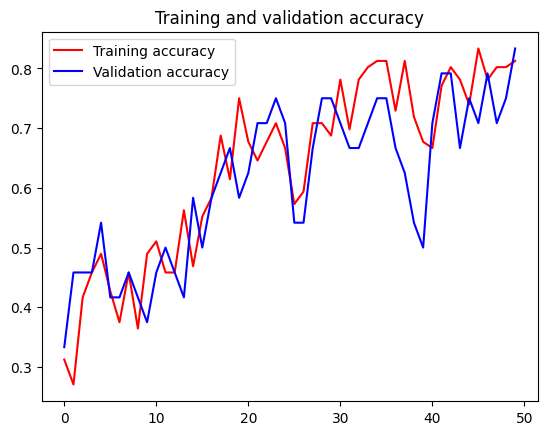

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
model.evaluate(train_generator)

10/10 [==============================] - 6s 564ms/step - loss: 0.3394 - accuracy: 0.8750


[0.3394046127796173, 0.875]

In [ ]:
model.evaluate(validation_generator)

5/5 [==============================] - 1s 173ms/step - loss: 0.8143 - accuracy: 0.8333


[0.8142626881599426, 0.8333333134651184]

In [ ]:
model.save('model.h5')